In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load and prepare the dataset

- Load the dataset into a dataframe named df_data (this step is done for you).
- Drop the name column. This column is not a feature required by the model.
- Create a dataframe named X containing all the columns except the status.
- Create a dataframe named y containing the status.

In [2]:
df_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df_data = df_data.drop(columns = 'name')
X = df_data.drop(columns = 'status')
y = df_data['status']

In [3]:
df_data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [4]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 3. Split the dataset into a training set and a test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)



### 4. Create the model


1.   Instantiate a Logistic Regression classifier with a `lbfgs` solver and penalty set to 'none'.
2.   Fit the classifier to the data.


In [63]:
lr = LogisticRegression(solver='lbfgs', penalty = 'l2', max_iter = 1000, C = 1.4)
lr.fit(X_train, y_train)

LogisticRegression(C=1.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 5. Calculate Accuracy

Calculate and print the accuracy of the model on the test data.

In [64]:
lr_score = lr.score(X_test,y_test)
lr_score
print('Accuracy of Logistic Regression without regularization: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression without regularization: 0.857


In [46]:
y_test.value_counts()

1    39
0    10
Name: status, dtype: int64

### 6. L2 Regularization

Train another model with L2 regularization and compare the accuracy of the new model to the previous one.

In [42]:
lr2 = LogisticRegression(solver='lbfgs', penalty = 'l2')
lr2.fit(X_train, y_train)

lr2_score = lr.score(X_test,y_test)
lr2_score

C:\Users\brian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8163265306122449

### 7. Choose the C parameter
Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.5. Plot a graph to show the accuracy on the test data versus the accuracy on the training data. Select an appropriate value for C and explain why that may be the best value.

In [ ]:
y_train.shape

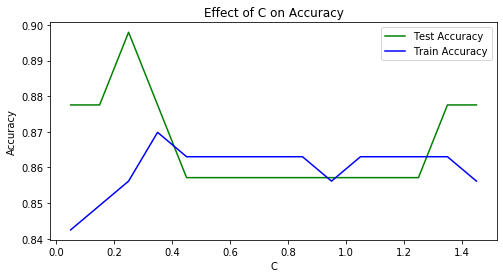

In [65]:
c_vals = np.arange(0.05, 1.5, 0.1)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='liblinear', penalty='l2', C= c, max_iter=1000)
  lr.fit(X_train,y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

C seems to have the highest accuracy around 0.4